In [ ]:
!pip uninstall vaderSentiment
!pip install vader-multi

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import seaborn as sns

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
analyzer.polarity_scores("Estamos encantados con ella")

{'neg': 0.0, 'neu': 0.548, 'pos': 0.452, 'compound': 0.5106}

In [ ]:
comp_df = pd.read_csv("compañias.csv")

In [ ]:
comp_df

,Unnamed: 0,lang,text,author,source,timestamp,id
0,0,es,"Estrenos mensuales en Movistar+, Netflix, Disn...",159917675,Twitter for iPhone,2022-01-01 01:22:09,1477087717167087621
1,1,es,@username Movistar @username @username @userna...,385918940,Twitter for Android,2022-01-01 02:27:16,1477104103926996994
2,2,es,"Movistar tratar a todos los equipos de fútbol,...",238286158,Talon Android,2022-01-01 08:20:30,1477192997016113153
3,3,es,"Movistar Bajada de precio de la fibra, mejorar...",82388144,Twitter for Android,2022-01-01 08:51:51,1477200887663804421
4,4,es,"Postes de Telefónica cortando la DP 401, a la ...",196401713,Twitter for iPhone,2022-01-01 09:22:55,1477208706182000640
...,...,...,...,...,...,...,...
159903,14036,es,Jazztel Los clientes ya sabemos eso. Los que n...,1227852829257326592,Twitter Web App,2022-06-30 20:26:43,1542605573895725056
159904,14037,es,Jazztel Lo que me gustaria saber es por qué ll...,1168354052,Twitter for Android,2022-06-30 21:07:14,1542615768289902592
159905,14038,es,"Jazztel Deberías cambiar esa bandera absurda, ...",1397178749985202176,Twitter for Android,2022-06-30 21:55:32,1542627925358481409
159906,14039,es,@username Jazztel Ya me falta poco y cambio de...,452596569,Twitter for Android,2022-06-30 22:17:56,1542633561169305602


In [ ]:
pd.set_option('display.max_colwidth', None)
comp_df = comp_df[["text","author","source","timestamp","id"]]
#comp_df['Puntuaciones'] = comp_df['text'].apply(lambda tw: analyzer.polarity_scores(tw))
comp_df['Puntuaciones'] = comp_df['text'].apply(lambda tw: None)
for index, row in comp_df.iterrows():
    try:
        tw = row['text']
        puntuaciones = analyzer.polarity_scores(tw)
        comp_df.at[index, 'Puntuaciones'] = puntuaciones
    except:
        comp_df = comp_df.drop(index)
comp_df['Puntuacion']  = comp_df['Puntuaciones'].apply(lambda score_dict: score_dict['compound'])
comp_df['Polaridad'] = comp_df['Puntuacion'].apply(lambda c: 'Positivo' if c > 0  else ('Negativo' if c < 0 else 'Neutral'))
comp_df

C:\Users\itsmagava\AppData\Local\Temp\ipykernel_11028\2711174025.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_df['Puntuaciones'] = comp_df['text'].apply(lambda tw: None)


,text,author,source,timestamp,id,Puntuaciones,Puntuacion,Polaridad
0,"Estrenos mensuales en Movistar+, Netflix, Disney+ y Prime Video [URL] #movisfera blog de Movistar",159917675,Twitter for iPhone,2022-01-01 01:22:09,1477087717167087621,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Neutral
1,"@username Movistar @username @username @username Albert, Alfred y la magia echa serie, música y literatura. Lo normal de la gente que es luz y es puro talento 👏🏻👏🏻👏🏻👏🏻🏳💚",385918940,Twitter for Android,2022-01-01 02:27:16,1477104103926996994,"{'neg': 0.0, 'neu': 0.945, 'pos': 0.055, 'compound': 0.4215}",0.4215,Positivo
2,"Movistar tratar a todos los equipos de fútbol, en las retransmisiones de Movistar, por igual",238286158,Talon Android,2022-01-01 08:20:30,1477192997016113153,"{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'compound': 0.4019}",0.4019,Positivo
3,"Movistar Bajada de precio de la fibra, mejorar la calidad de sonido e imagen en todos los canales tv y mejorar el sonido en los audios de radio en las retramisiones deportivasñ",82388144,Twitter for Android,2022-01-01 08:51:51,1477200887663804421,"{'neg': 0.081, 'neu': 0.704, 'pos': 0.215, 'compound': 0.5574}",0.5574,Positivo
4,"Postes de Telefónica cortando la DP 401, a la altura del Km 3, en Ares (A Coruña). Movistar [URL]",196401713,Twitter for iPhone,2022-01-01 09:22:55,1477208706182000640,"{'neg': 0.097, 'neu': 0.903, 'pos': 0.0, 'compound': -0.128}",-0.1280,Negativo
...,...,...,...,...,...,...,...,...
159903,Jazztel Los clientes ya sabemos eso. Los que no se saben y no cumplen el contrato es Jazztel.\nJazztel deberia leer el contrato y cumplir lo que está escrito.\nRecomiendo escapar de Jazztel.\nFalso todo lo que prometen.,1227852829257326592,Twitter Web App,2022-06-30 20:26:43,1542605573895725056,"{'neg': 0.056, 'neu': 0.792, 'pos': 0.151, 'compound': 0.4756}",0.4756,Positivo
159904,"Jazztel Lo que me gustaria saber es por qué llevo una semana contratando vuestro servicio de Jazztel TV con la oferta gratis para clientes con datos ilimitados y nunca recibo el sms con la activación, gracias",1168354052,Twitter for Android,2022-06-30 21:07:14,1542615768289902592,"{'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'compound': 0.8271}",0.8271,Positivo
159905,"Jazztel Deberías cambiar esa bandera absurda, o ahora Jazztel es LGBT",1397178749985202176,Twitter for Android,2022-06-30 21:55:32,1542627925358481409,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Neutral
159906,@username Jazztel Ya me falta poco y cambio de empresa. Suerte!,452596569,Twitter for Android,2022-06-30 22:17:56,1542633561169305602,"{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'compound': 0.5093}",0.5093,Positivo


<AxesSubplot:xlabel='Polaridad', ylabel='count'>

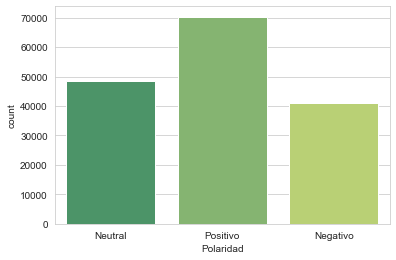

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Polaridad',data=comp_df, palette='summer')

In [ ]:
polarity_freq = comp_df['Polaridad'].value_counts()
polarity_freq

Positivo    70337
Neutral     48367
Negativo    41169
Name: Polaridad, dtype: int64

In [ ]:
polarity_freq = comp_df['Polaridad'].value_counts(normalize=True) * 100
polarity_freq

Positivo    43.995546
Neutral     30.253389
Negativo    25.751065
Name: Polaridad, dtype: float64

<AxesSubplot:ylabel='Polaridad'>

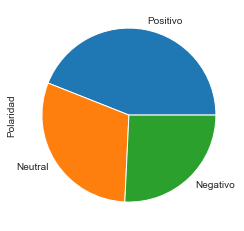

In [ ]:
polarity_freq.plot(kind='pie')

In [ ]:
comp_df.to_csv("TweetsPolarizados.csv")